<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-118/blob/main/Equipo118__Reto_Entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Entrega 1: Limpieza, análisis, visualización y kmeans.**

Para este reto decidimos utilizar la infomacion de aguas subterraneas, para utilizar los archivos CSV de una forma mas sencilla los colocamos en el GitHUb del equipo.


In [113]:
#Importamos las principales librerias que utilizaremos:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import requests

In [114]:
#Importamos la informacion sobre los parametros de las aguas subterraneas:
url="https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-118/main/Reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
Datos = pd.read_csv(url)
Datos.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [115]:
#Importamos las informacion de las escalas para categorizar las aguas subterraneas:
url = "https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-118/main/Reto/Escalas_subterranea.csv"
Escalas=pd.read_csv(url)
Escalas.head()

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....


#1. Exploracion del conjunto de datos:

**EDA (Exploratory Data Analysis)**

Antes de realizar algun cambio o transformacion optamos por hacer una exploracion siguiendo los pasos de EDA para poder tomar una mejor desicion sobre como se limpiaran o transformaran los datos del conjunto.

In [116]:
#Dimensiones del Conjunto
Datos.shape

(1068, 57)

In [117]:
#Nombre de las columnas
Datos.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

Los pasos anteriores nos permiten confirmar que el archivo haya sido exportado de forma correcta y que no existan perdidas, esto debido a que connocemos las dimensiones del archivo original.

In [118]:
#Tipo de datos
Datos.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

De igual manera validamos que los tipos de datos concordaran con los valores que se tenian en las columnas. 

Posteriormente utilizamos funciones para explorar los tipos de datos.

In [119]:
#Utilizamos describe para encontrar estadisticas descriptivas del conjunto.
#Solo funciona para variables numericas
Datos.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


Al observar que SDT tenia un count de 0 y las demas estadisticas en NaN quisimos comprobar la media para dicho campo por lo que utilizamos mean().

In [120]:
#Revisamos el promedio de cada caracteristica
Datos.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


LONGITUD         -101.891007
LATITUD            23.163618
PERIODO          2020.000000
ALC_mg/L          235.633759
CONDUCT_mS/cm    1138.953013
SDT_mg/L                 NaN
dtype: float64

In [121]:
#Buscamos la cantidad de datos nulos que hay en por cada caracteristica
Datos.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

#Limpieza del conjunto de datos:

Debido a que la columna SDT_mg/L no contiene ningun registro, estará sera eliminada, pero ya que no deseamos perder el Dataframe original realizamos una copia del conjunto.

In [122]:
Datos_Limpios = Datos
Datos_Limpios.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [123]:
#Eliminar la columna que no contiene datos
Datos_Limpios.drop('SDT_mg/L', axis=1, inplace=True)

Al revisar la descripcion del conjunto nos percatamos que la razon por la cual las columnas numericas estaban mal clasificadas era debido a que algunos registros tenian simbolo de < o > por lo que procederemos a eliminarlo de las variables numericas.

In [124]:
Datos_Limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1066 non-null   object 
 15  CALIDAD_SDT_ra       

In [125]:
#Eliminamos los simbolos de las columnas numericas
Col_Num = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L',
          'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] 

Datos_Limpios[Col_Num] = Datos_Limpios[Col_Num].replace({'<':''}, regex=True) #Eliminamos el simbolo de < de todas las columnas numericas

In [126]:
#Despues que eliminamos los simbolos podemos cambiar las columnas a su tipo correcto (numericas)

for name in Col_Num:
   mediana = Datos_Limpios[name].median() 
   Datos_Limpios[name]= Datos_Limpios[name].astype('float')
   Datos_Limpios[name]=Datos_Limpios[name].replace(np.nan, mediana)  #Remplazamos valores nulos por la media


In [127]:

for name in Col_Num:
   Datos_Limpios[name].replace(np.nan, np.mean)

In [128]:
#Comprobamos que los tipos de datos sean correctos
Datos_Limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1068 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1068 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1068 non-null   float64
 15  CALIDAD_SDT_ra       

Ahora que tenemos los tipos de datos correctos podemos remplazar los valores nulos con la media.

Decidimos tratar la informacion perdida de esta forma para evitar perder una gran cantidad de registros al eliminar aquellos que contenian valores nulos.

In [129]:
#Valiamos la que ya no haya valores nulos en las variables numericas
Datos_Limpios.isnull().sum()

CLAVE                     0
SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
PERIODO                   0
ALC_mg/L                  0
CALIDAD_ALC               4
CONDUCT_mS/cm             0
CALIDAD_CONDUC            6
SDT_M_mg/L                0
CALIDAD_SDT_ra            2
CALIDAD_SDT_salin         2
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  0
CALIDAD_DUR               1
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                0
CALIDAD_N_NO3             1
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L         

Con neustro conjunto de datos normalizado podemos realizar la matriz de correlaciones apra identificar los medidas de posición no centrales , los cuartiles , outliers.

Como solo necesitamos los datos numericos, excluimos las demas caracteristicas.

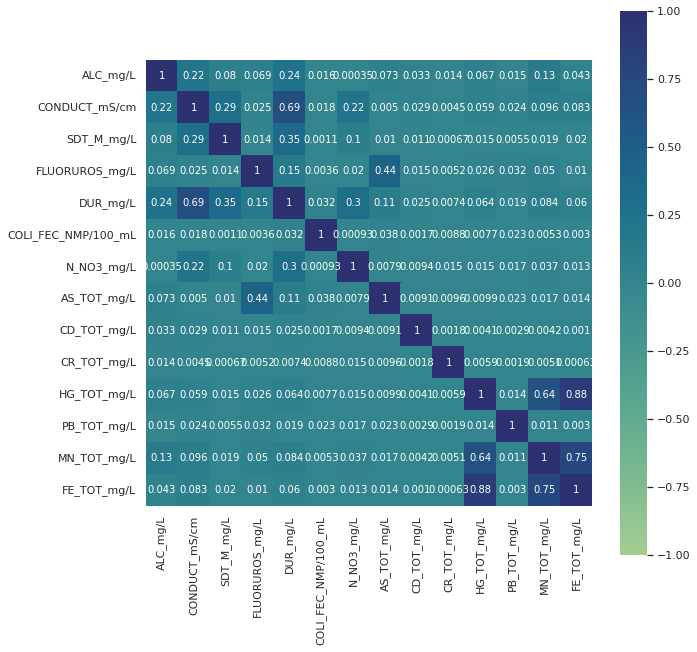

In [130]:
#Tomamos las variables numericas
import seaborn as sns
Datos_Num = Datos_Limpios[Col_Num]
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(Datos_Num.corr().abs(), vmax = 1, vmin = -1, square = True, annot = True,  cmap="crest" )

Podemos observar que la mayoria de los datos no se encuentran estrechamente relacionados a excepcion de 5 combinaciones de las 190 que se tienen superan el 0.4 de correlacion.

Estas combinaciones son:
1. DUR_mg/L & CONDUCT_mS/cm.
2. MN_TOT_mg/L & HG_TOT_mg/L.
3. FE_TOT_mg/L & HG_TOT_mg/L.
4. FE_TOT_mg/L & MN_TOT_mg/L.

In [131]:
Datos_Num

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500
2,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500
3,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
1064,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860


Como tambien nos interesa conocer la distribucion de los datos para encontrar las medidas de posición no centrales , los cuartiles y outliers, hemos decidido hacer uso de Boxplot.

In [132]:
sns.set(rc={'figure.figsize':(11.7,10.27)})

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text major ticklabel objects>)

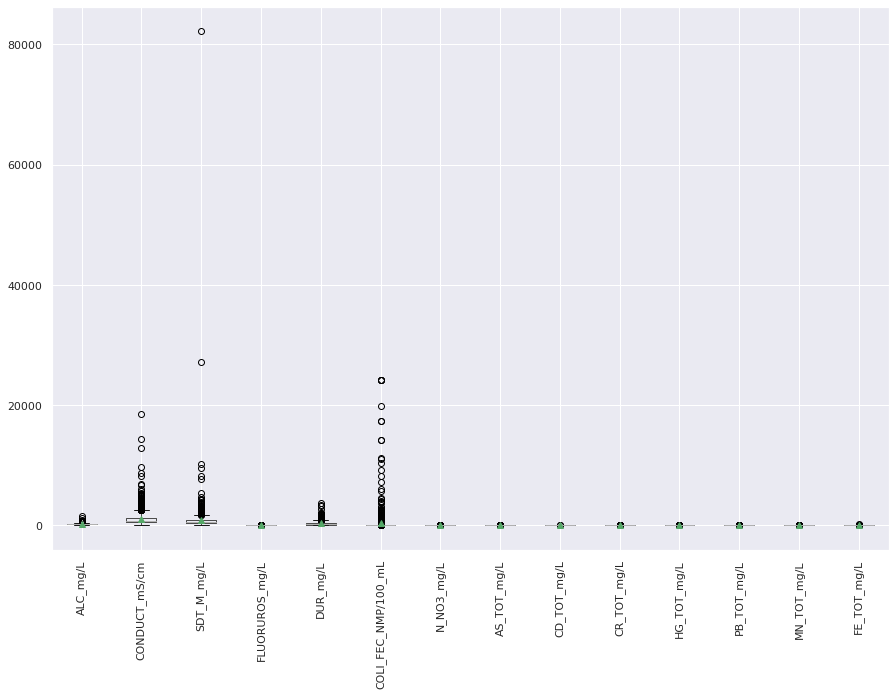

In [133]:
#sns.boxplot(data=Datos_Num, dodge=False, palette="Blues")
outliers = Datos_Num.boxplot(figsize = (15,10),showmeans = True)
#Datos_Num.plot(kind='box', figsize = (15,10))
outliers.plot()
plt.xticks(rotation=90)

Debido a que los datos no se encuentran escalados, pues deseamos conocer la distribucion con los valores originales y la variacion de una columna a otra es significativa, pues mientras algunas columnas tienen informacion <0.03 otras estan en escalas de cientos y miles.

Por lo que tomamos la decicion de crear un ciclo para ver el diagrama de cajas y la distribucion por columna; De igual manera se añadio la variable Skew que nos indica la posicion de la media del conjunto.

Skew : 3.3


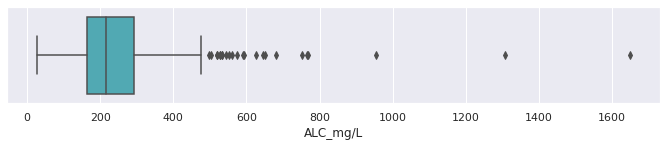

Skew : 6.02


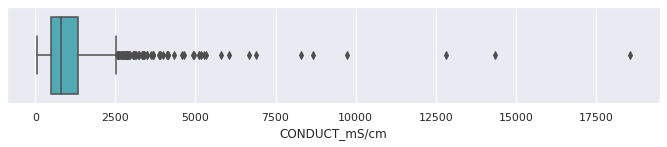

Skew : 25.22


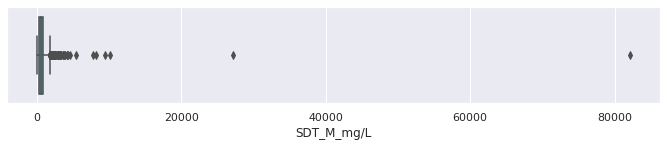

Skew : 8.23


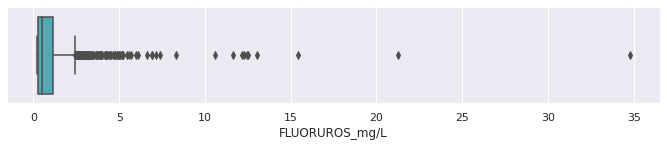

Skew : 3.41


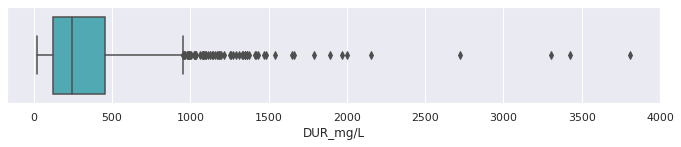

Skew : 8.96


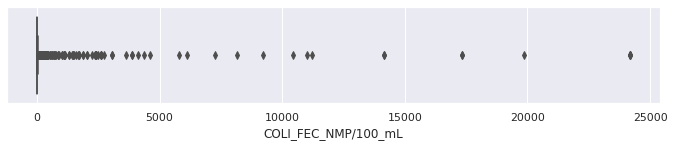

Skew : 7.05


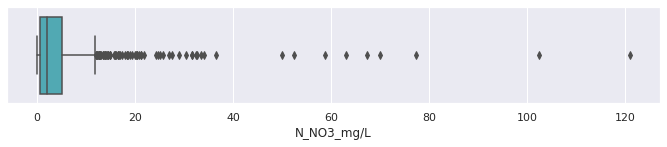

Skew : 6.65


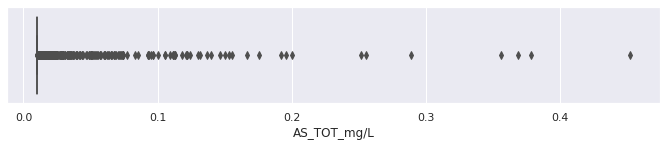

Skew : 32.32


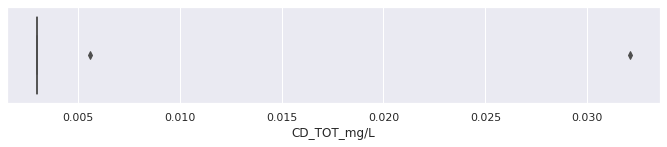

Skew : 31.75


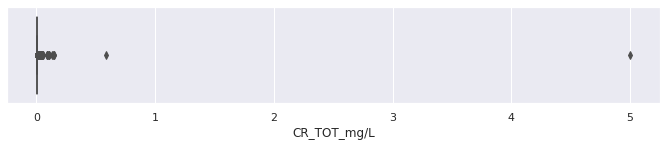

Skew : 23.74


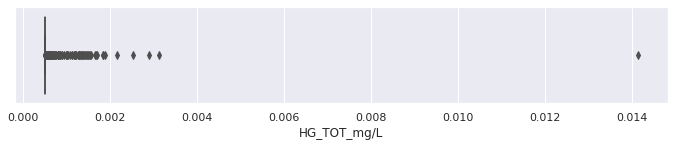

Skew : 17.24


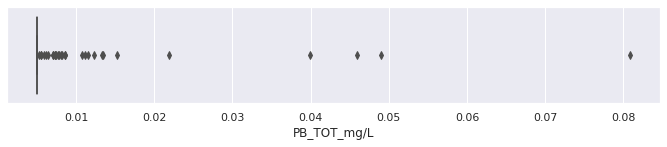

Skew : 14.7


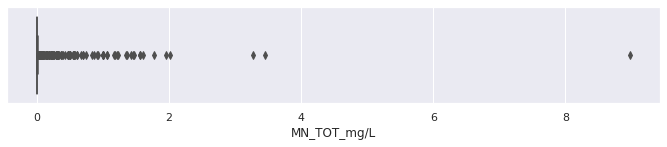

Skew : 31.34


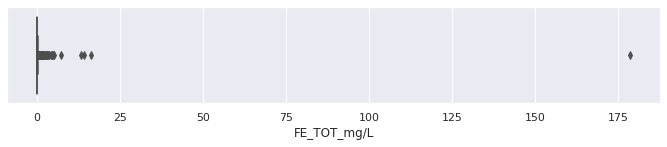

In [134]:
#sns.boxplot(data=Datos_Num, dodge=False, palette="Blues")

for names in Datos_Num:
   # print(Datos_Num[names])
    print('Skew :',round(Datos_Num[names].skew(),2))
    #plt.figure(figsize=(15,4))
    #plt.subplot(1,2,1)
    Datos_Num[names].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(5,1,5)
    sns.boxplot(x=Datos_Num[names], palette="YlGnBu")
    plt.show()


Las caracteristicas que tienen distribuciones mas equitativas y menos datos atipicos son aquellos con un valor de Skew menor, siedo estas:

1. ALC_mg/L con un Skew de 3.3 con una media aproximada de 250, valores atipicos que osicilan entre 500 y 800, con solo 3 valores que salen del rango superando los 1000.
2. DUR_mg/L con un Skew de 3.4 con una media aproximada de 250, un maximo de 900, valores atipicos que osicilan entre 1000 y 2100, con solo 4 valores que salen del rango superando los 2500.

Mientras quue las caracteristicas que tienen una peor distribucion de datos y donde es complicado dedterminar los limites son:
3. CD_TOT__mg/L con un Skew de 32.22 donde los datos atipicos estan distribuidos en un rango de 0.05 a 0.003. La distribucion de los demas datos, tanto la media, maximo y minimo es imperceptible, esto puede ocasionarse debido a que los datos se encuentran muy juntos o todos tienen el mismo valor.
3. CR_TOT__mg/L con un Skew de 31.75 donde los datos atipicos estan distribuidos en un rango de 0.8 a 5. La distribucion de los demas datos, tanto la media, maximo y minimo es ilegible, sin embargo, para esta caracteristica es ocasionado debido a que se tiene un valor atipico complemtamente fuera del rango, mientras que los valores normalmente se encuentran alrededor de 0.5 a 0.40 tenemos un valor que va hasta el 5, podriamos deducir que este es un dato erroneo.

#K-means
Para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica utilizaremos el metodo de K- means.

In [135]:
#Definimos las variables
Lat_Lon = Datos[['LONGITUD','LATITUD']] #Tomamos el dataframe original pues no las variables a utilizar no fueron modificadas
Y = pd.DataFrame(Datos['SEMAFORO']) #Es nuestro target

In [136]:
#Validacion de las variables
#Lat_Lon.head()
Y.head()

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo


Para poder visualizar las ubicaciones de las aguas subterraneas necesitamos las coordenadas, por lo que creamos una nueva columna con dicha informacion.

In [137]:
#Instalacion de libreria
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
#Importamos librerias
import geopandas as gpd
from shapely.geometry import Point

In [139]:
#Creacion de coordenadas
Lat_Lon["COORDENADAS"] = list(zip(Lat_Lon.LONGITUD, Lat_Lon.LATITUD))
Lat_Lon["COORDENADAS"] = Lat_Lon["COORDENADAS"].apply(Point)
Lat_Lon.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


Una vez que ya tengamos los coordenadas podemos crear la visualizacion con las librerias importadas.

,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


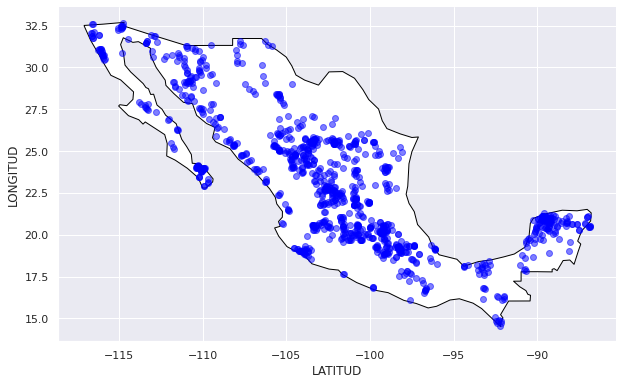

In [140]:
Vis_map = gpd.GeoDataFrame(Lat_Lon, geometry="COORDENADAS")
Mapa = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

Mapa = Mapa.set_index("iso_a3")
Mapa.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

#Como solo tenemos informacion de Mexico, filtramos el mapa a visualizar
Mapa.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

#Establecemos el texto a mostrar en los ejes
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

Vis_map.plot(ax=gax, color='blue', alpha = 0.5)
Vis_map

Para determinar el numero de clusters optimo en los que se agrupara nuestro conjunto, utilizamos el metodo de **Elbow Curve** antes de nuestro modelo de K-means, el cual funciona calculando La Suma del Error Cuadrado de cada K y se selecciona aquel que es mas representativo y con un mayor incremento al acercarse a 1.

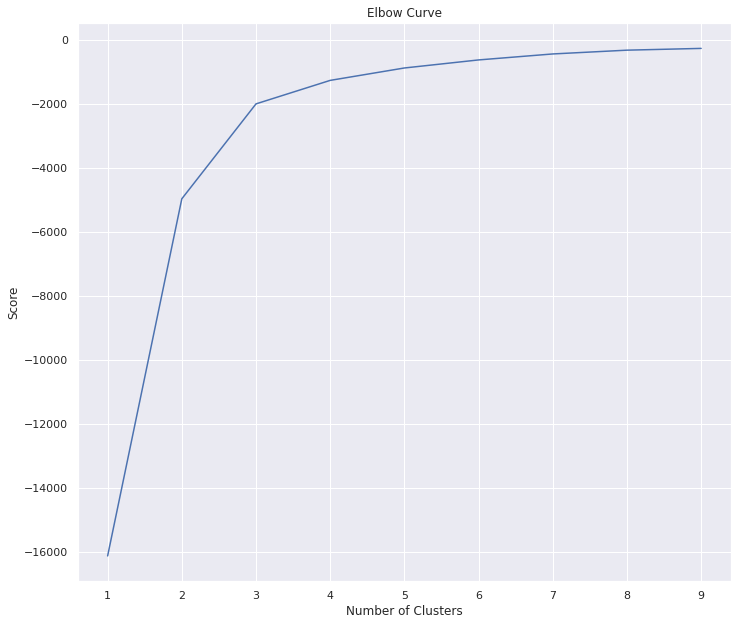

In [141]:
#Curva utilizando SSE
from sklearn.cluster import KMeans

K_clusters = range(1,10) #Probara con 10 Clusters
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = Lat_Lon[['LATITUD']]
X_axis = Lat_Lon[['LONGITUD']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualizacion
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Podemos optar por seleccionar 3 o 4 clusters puesto que son donde se tiene incrementos mas significativo, la cantidad de clusters posteriores no aportarian significativamente al modelo por lo que solo representa una inversion de recursos inecesarios.

In [142]:
X

,LONGITUD,LATITUD,cluster_label
0,-102.02210,22.20887,0
1,-102.20075,21.99958,0
2,-102.28801,22.36685,1
3,-102.29449,22.18435,0
4,-110.24480,23.45138,3
...,...,...,...
1063,-99.54191,24.76036,1
1064,-99.70099,24.78280,1
1065,-99.82249,25.55197,1
1066,-100.32683,24.80118,1


In [153]:
#Modelo de K-means
X = Lat_Lon[["LONGITUD","LATITUD"]]

kmeans = KMeans(n_clusters = 3, init ='k-means++') # Calculo de las K-mean y numero de clusters
kmeans.fit(X)

centroid = kmeans.cluster_centers_ # Coordenadas de los centros
labels = kmeans.predict(X) # Cluster por registro

X['cluster_label'] = kmeans.fit_predict(X)

Para este modelo seleccionamos 4 clusters, por lo que validammos la cantidad de clusters creados

In [154]:
#Validamos la cantidad de Clusters creados
X.cluster_label.unique()

array([0, 2, 1], dtype=int32)

In [155]:
#Almacenamos los centros de los grupos para determinar su ubicacionn
ck = pd.DataFrame(centroid)
ck

,0,1
0,-101.722127,22.254226
1,-110.794488,28.438202
2,-90.728470,19.473362


In [156]:
#Almacenamos las Longitud y Latitud de los centros como Coordenada en una variable
ck["Coordinates"] = list(zip(ck[0], ck[1]))
ck["Coordinates"] = ck["Coordinates"].apply(Point)

gdf_k = gpd.GeoDataFrame(ck, geometry="Coordinates")
gdf_k.head()

,0,1,Coordinates
0,-101.722127,22.254226,POINT (-101.72213 22.25423)
1,-110.794488,28.438202,POINT (-110.79449 28.43820)
2,-90.728470,19.473362,POINT (-90.72847 19.47336)


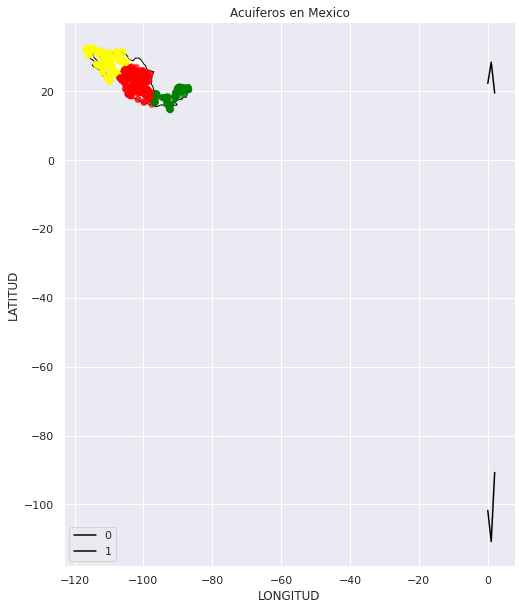

In [166]:
#Mapa con clusters

fig, gax = plt.subplots(figsize=(15,10))
colores = ['red','yellow','green']
color_asig = []

for row in labels:
  color_asig.append(colores[row])

Mapa.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

Vis_map.plot(ax=gax, color=color_asig, alpha = .5) 
ck.plot(ax=gax, color='black', alpha = 1, markersize = 10) 

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


In [ ]:
Datos['SEMAFORO'].hist(bins = 10, figsize=(5,5))